In [1]:
'''
    导包 np
    从numpy 导入 fft ifft
    导入图片库中PIL中的Image
    
    猫的眼睛滑动到猫的耳朵下面 有剧烈的变化 一下就变成其他的事物了
    
    有两个常规的函数 正弦和余弦 
    
    正弦波和余弦波 任何图形 通过正弦波 余弦波的运算得到
    正方形可以 圆也可以 三维立体也能 3d打印最基础的波 就是通过傅里叶转换得到的
    
    猫耳朵和到猫耳朵尖 变化属于高频率
    猫左眼到猫有眼频率低
'''
import numpy as np

#fft傅里叶转换 ifft傅里叶反转
from numpy.fft import fft,ifft

from PIL import Image


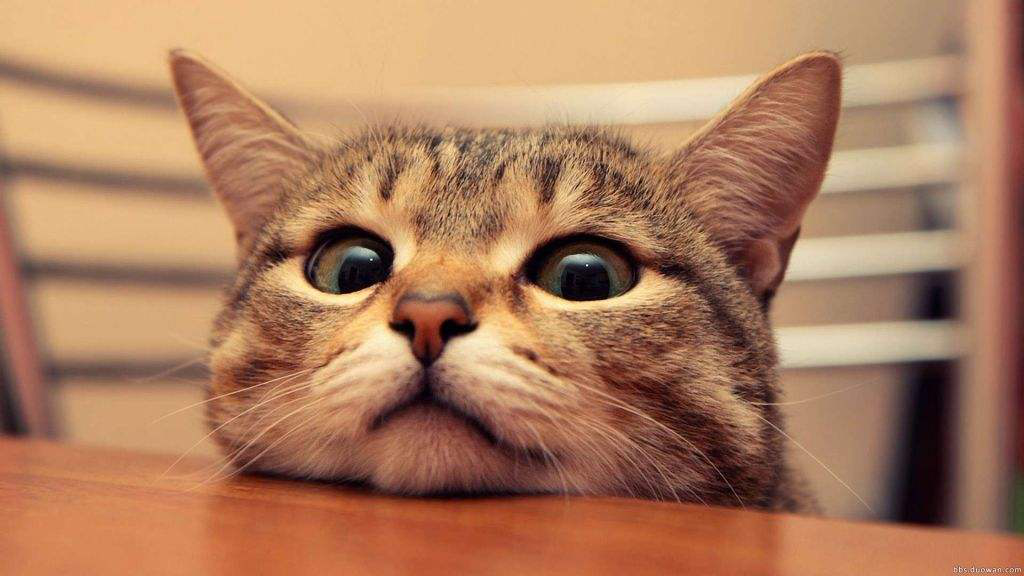

In [3]:
#读取数据
cat = Image.open('cat.jpg')

cat

In [5]:
#转换成int类型 数据 int8 = 128  颜色 0-255    int8最大128 大于128会变成负数
cat_data  = np.fromstring(cat.tobytes(),dtype=np.int8)
cat_data
#之所以有负数 是因为 int8是小于128 而颜色值是0-255 只要大于128就变成负数

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  from ipykernel import kernelapp as app


array([ -27,  -70, -123, ...,  -53,   99,   62], dtype=int8)

In [6]:
cat_data_fft = fft(cat_data)
#有虚数  前面的负数是实数  后面是虚数 

#将真实的数据 转换成频域 
cat_data_fft

array([ -1455184.        -5.29475344e-11j,
       -10822734.37506339+1.99393726e+07j,
        -6469102.46255268+1.53173438e+07j, ...,
        -2369771.93992077-6.44130251e+06j,
        -6469102.46255268-1.53173438e+07j,
       -10822734.37506339-1.99393726e+07j])

In [10]:
#将傅里叶的数据去除低频的波 设置为0  变化不大 
#有些数据变为空  
# np.where(np.abs(cat_data_fft<1e5,0,cat_data_fft))

cat_data_fft[np.where(np.abs(cat_data_fft)<1e5)] = 0 

#反转 
cat_data_ifft = ifft(cat_data_fft)

display(cat_data_ifft)


#只要实数 np.real()

cat_data_real = np.real(cat_data_ifft)
display(cat_data_real)

array([-36.45254229+1.59449237e-15j,  35.32465318+1.66332076e-14j,
       -27.09181261-2.31655124e-14j, ..., -11.48152263-3.07690068e-14j,
        61.78435976+9.09974674e-15j,   5.02803503+2.34267476e-14j])

array([-36.45254229,  35.32465318, -27.09181261, ..., -11.48152263,
        61.78435976,   5.02803503])

In [11]:
#去除小数部分
cat_data_result = np.int8(cat_data_real)
cat_data_result  #变成int

array([-36,  35, -27, ..., -11,  61,   5], dtype=int8)

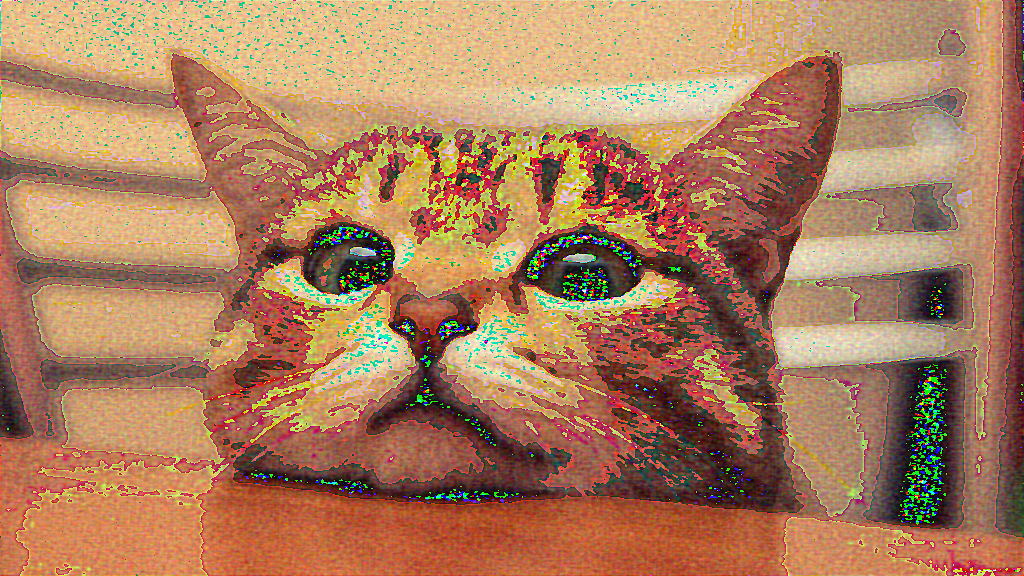

In [14]:
#再把一位数组转换成图片  之前图片的大小 模式
cat_Image = Image.frombytes(data = cat_data_result,size=cat.size,mode=cat.mode)
cat_Image #傅里叶轮廓绘制